In [1]:
import numpy as np
import pandas as pd

In [2]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')

In [3]:
matches.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

## Q1
In IPL matches dataset some teams name has changed. You will have to consider them as same.

'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [5]:
matches.head(2)
changes = {'Delhi Daredevils' : 'Delhi Capitals',
           'Kings XI Punjab' : 'Punjab Kings',
           'Rising Pune Supergiants' : 'Rising Pune Supergiant'    
}
matches.replace(changes.keys(),changes.values(),inplace=True)
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

# Q2
Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.

Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)

<AxesSubplot:>

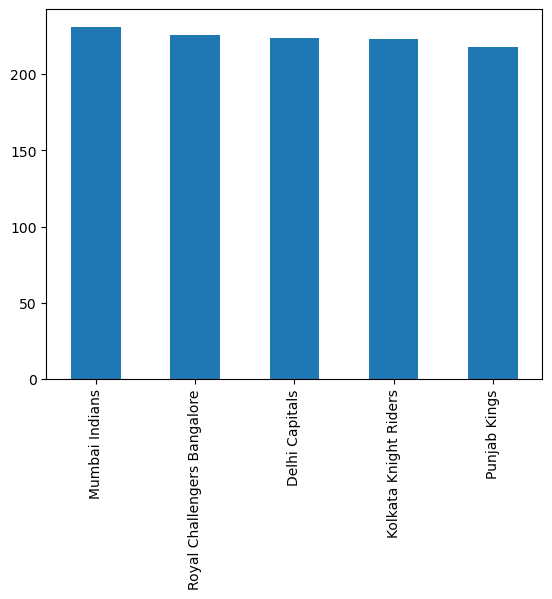

In [6]:
(matches.Team1.value_counts() + matches.Team2.value_counts()).sort_values(ascending = False).head().plot(kind = 'bar')

# Q3
Player who got Most no. of player of the match award playing against Mumbai Indians.
Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.

In [7]:
matches.head(3)
pom =(matches.Team1 == 'Mumbai Indians') |(matches.Team2 == 'Mumbai Indians')
matches[pom].Player_of_Match.value_counts().head(1)

RG Sharma    16
Name: Player_of_Match, dtype: int64

# Q4
Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

In [8]:
def two_teams(t1,t2):
    t1 = (matches.Team1 == t1) |(matches.Team2 == t1)
    t2 = (matches.Team1 == t2) |(matches.Team2 == t2)
    df = matches[t1 & t2]
    print(df['WinningTeam'].value_counts())
    print(df['Player_of_Match'].value_counts().head(1))
two_teams('Kolkata Knight Riders','Chennai Super Kings')

Chennai Super Kings      17
Kolkata Knight Riders     9
Name: WinningTeam, dtype: int64
RA Jadeja    3
Name: Player_of_Match, dtype: int64


# Q5
Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

<AxesSubplot:>

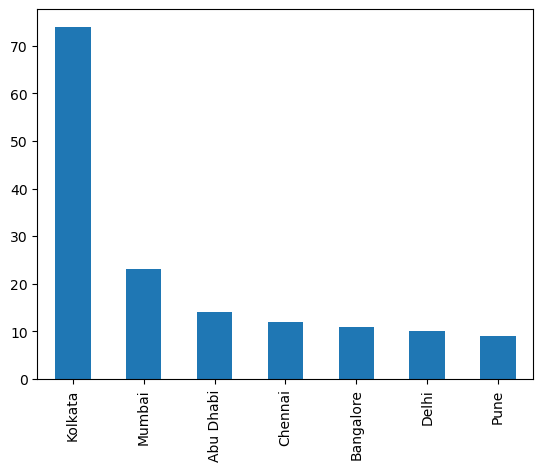

In [9]:
matches[(matches.Team1 == 'Kolkata Knight Riders') |(matches.Team2 == 'Kolkata Knight Riders')]['City'].value_counts().sort_values(ascending = False).head(7).plot(kind='bar')

# Q6
Find out the average margin for the team Mumbai Indians for only the session 2011.

In [10]:
matches[((matches.Team1 == 'Mumbai Indians') |(matches.Team2 == 'Mumbai Indians'))& (matches.Season =='2011')]['Margin'].mean()

19.25

# Q7
 Make a dataframe of each team in IPL with details like - Team Name, Matches Played, Win%, Home Win%, Away Win%.

In [11]:
df_1 = matches[~matches['WinningTeam'].isna()]
new_df = pd.DataFrame()
teams = df_1.Team1.unique()
data = []
for team in teams:
    played = df_1[(df_1.Team1 == team)| (df_1.Team2 == team)].shape[0]
    wins = df_1[df_1.WinningTeam == team].shape[0]
    home_win = df_1[(df_1.WinningTeam == team) &(df_1.Team1 == team)].shape[0] / df_1[(df_1.Team1 == team)].shape[0]*100
    away_win = df_1[(df_1.WinningTeam == team) & (df_1.Team2 == team)].shape[0] / df_1[(df_1.Team2 == team)].shape[0]*100
    data.append([team, played,wins/played*100,home_win,away_win])
new_df[["Team", "Matches Played", "Win Percentage", "Home Win Percentage", "Away Win Percentage"]] = data
new_df.sort_values("Win Percentage", inplace=True, ascending=False)
new_df

,Team,Matches Played,Win Percentage,Home Win Percentage,Away Win Percentage
5,Gujarat Titans,16,75.0,57.142857,88.888889
6,Lucknow Super Giants,15,60.0,87.5,28.571429
4,Chennai Super Kings,208,58.173077,58.558559,57.731959
9,Mumbai Indians,231,56.709957,58.035714,55.462185
7,Kolkata Knight Riders,223,51.121076,53.333333,49.152542
0,Rajasthan Royals,190,50.526316,55.05618,46.534653
10,Rising Pune Supergiant,30,50.0,50.0,50.0
2,Sunrisers Hyderabad,152,49.342105,52.173913,46.987952
1,Royal Challengers Bangalore,223,48.878924,49.593496,48.0
3,Delhi Capitals,222,46.396396,46.902655,45.87156


# Q8
Venues with most "no result" matches.

In [12]:
matches[matches.WonBy == 'NoResults'].Venue.value_counts().index[0]

'M Chinnaswamy Stadium'

# Q9
Player with most appearance in final match.
Team1Players and Team2Players have all players name. It is not a list of players name instead it is str. So handle it as string.

Hint: split and strip will help; Make a series of all players in final and do value counts

In [13]:
def player_names(l):
    return pd.Series(list(map(lambda x: x.strip("'"),l.lstrip("'[").rstrip(']').split(", "))))
df_final = matches[matches.MatchNumber == 'Final']
playerSeries = pd.Series
series_list = []
for player_list in df_final.Team1Players:
    x = player_names(player_list)
    series_list.append(x)
for player_list in df_final.Team2Players:
    x = player_names(player_list)
    series_list.append(x)
playerSeries = pd.concat(series_list)
playerSeries.value_counts().head()

MS Dhoni     10
SK Raina      8
AT Rayudu     7
R Ashwin      7
DJ Bravo      7
dtype: int64

# Q10
IPL Point Table
Make a function point_table which take season as parameter and show points table in non-ascendng order of points and in ascending order of team name.

For winning - 2 Points; For loosing - 0 Point For not result both team gets 1 points.

Make dataframe which will have TeamName MatchesPlayed MatchesWon NoResult Points make TeamName as index.

In [17]:
def matches_played(df,team):
    return df[(df.Team1 == team) | (df.Team2 == team)].shape[0]
def matches_won(df,team):
    return df[df.WinningTeam == team].shape[0]
def no_result(df,team):
    return df[((df.Team1 == team) | (df.Team2 == team)) & (df.WinningTeam.isnull())].shape[0]

def points_table(season):
    df = matches[matches.Season == season]
    new_df = pd.DataFrame()
    new_df['Team Name'] = df.Team1.unique()
    new_df['MatchesPlayed'] = new_df['Team Name'].apply(lambda x:matches_played(df,x))
    new_df['MatchesWon'] = new_df['Team Name'].apply(lambda x:matches_won(df,x))
    new_df['NoResult'] = new_df['Team Name'].apply(lambda x:no_result(df,x))
    new_df['Points'] = new_df['MatchesWon']*2 + new_df['NoResult']
    new_df.sort_values('Points',ascending = False,inplace = True)
    new_df.set_index('Team Name',inplace = True)
    return new_df

points_table('2022')

,MatchesPlayed,MatchesWon,NoResult,Points
Team Name,,,,
Gujarat Titans,16,12,0,24
Rajasthan Royals,17,10,0,20
Royal Challengers Bangalore,16,9,0,18
Lucknow Super Giants,15,9,0,18
Delhi Capitals,14,7,0,14
Punjab Kings,14,7,0,14
Sunrisers Hyderabad,14,6,0,12
Kolkata Knight Riders,14,6,0,12
Chennai Super Kings,14,4,0,8


# Q 11 
IPL Point Table cont.
Extend the above IPL Point Table with an extra column as `SeasonPosition`

Team below top 4 after sorting on `Points` and then on `TeamName` Will have same `SeasonPosition` as there rank. use rank function.

Teams in Top four will have `SeasonPosition` as:
```
    'Winner' - Team won final
    'Runner' - Team lost Final
    3 - Losing Team in Qualifier2
    4 - Losing Team in Eliminator
```

For changing value of pariticular cell use `df.at[row_index, col_label] = value`

Output of two Top 2 in season 2022. Your result should have all teams.
```
TeamName    MatchesPlayed	MatchesWon	NoResult	Points   SeasonPosition

Gujarat Titans	    16	   12	       0	     24         Winner
Rajasthan Royals	  17	   10	       0	     20         Runner


In [22]:
def points_table_extend(season):
    df_2 = points_table(season)
    df = matches[matches.Season == season].copy()
    df_2['SeasonPosition'] = df_2.Points.rank(ascending = False, method = 'first').astype('object')
    df['Loosing_Team'] = np.where(df['WinningTeam']==df['Team1'],df['Team2'],df['Team1'])
    final = df[df["MatchNumber"] == "Final"]
    winning_team = final.WinningTeam.values[0]
    loosing_team = final.Loosing_Team.values[0]
    df_2.loc[winning_team,'SeasonPosition'] = 'Winner'
    df_2.loc[loosing_team,'SeasonPosition'] = 'RunnersUp'
    q = df[df["MatchNumber"] == "Qualifier 2"]
    e = df[df["MatchNumber"] == "Eliminator"]
    third = q.Loosing_Team.values[0]
    fourth = e.Loosing_Team.values[0]
    df_2.loc[third, "SeasonPosition"] = "Third"
    df_2.loc[fourth, "SeasonPosition"] = "Fourth"
    return df_2
points_table_extend("2022")

,MatchesPlayed,MatchesWon,NoResult,Points,SeasonPosition
Team Name,,,,,
Gujarat Titans,16,12,0,24,Winner
Rajasthan Royals,17,10,0,20,RunnersUp
Royal Challengers Bangalore,16,9,0,18,Third
Lucknow Super Giants,15,9,0,18,Fourth
Delhi Capitals,14,7,0,14,5.0
Punjab Kings,14,7,0,14,6.0
Sunrisers Hyderabad,14,6,0,12,7.0
Kolkata Knight Riders,14,6,0,12,8.0
Chennai Super Kings,14,4,0,8,9.0


In [23]:
deliveries = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
deliveries.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


# Q12
From the IPL  dataset you have to find the Purple cap holder each season.

Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.

Bowler's Economy = runs-conceded per six balls

In [25]:
ipldf = deliveries.merge(matches[['Season','ID']],on = 'ID')
ipldf['IsBowlerWicket'] = ipldf.kind.apply(lambda x : 1 if x in ['caught', 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket']else 0)
ipldf['BowlerRun'] = ipldf.extra_type.apply(lambda x : 0 if x in ["legbyes", "byes"] else 1) * ipldf['total_run']
ipldf['IsLegalBowl'] = ipldf.extra_type.apply(lambda x: 0 if x in ["wides", "noballs"] else 1) 
newipl_df = ipldf.groupby(['Season','bowler'],as_index = False)[['IsBowlerWicket','BowlerRun','IsLegalBowl']].sum()
newipl_df['Economy'] = ipldf['BowlerRun']/ipldf['IsLegalBowl'] * 6
newipl_df.sort_values(['IsBowlerWicket', 'Economy'],ascending = [False,True]).drop_duplicates('Season',keep='first').sort_values('Season')

,Season,bowler,IsBowlerWicket,BowlerRun,IsLegalBowl,Economy
84,2007/08,Sohail Tanvir,22,266,247,6.0
174,2009,RP Singh,23,417,358,0.0
284,2009/10,PP Ojha,21,429,353,36.0
447,2011,SL Malinga,28,375,378,6.0
537,2012,M Morkel,25,453,378,inf
629,2013,DJ Bravo,32,497,375,36.0
779,2014,MM Sharma,23,452,323,0.0
847,2015,DJ Bravo,26,426,314,0.0
938,2016,B Kumar,23,490,396,6.0
1048,2017,B Kumar,26,369,314,6.0


# Q13
Q-7: Best bowler in death overs. Note: Have taken most no of wickets in case of tie with least economy

Death Overs - [16-20]

In [26]:
death_overs = ipldf[ipldf.overs>=15]
df_new = death_overs.groupby(['bowler'],as_index = False)[['IsBowlerWicket','BowlerRun','IsLegalBowl']].sum()
df_new['Economy'] = death_overs['BowlerRun']/death_overs['IsLegalBowl'] * 6
df_new.sort_values(["IsBowlerWicket", "Economy"], ascending = [False, True]).head()

,bowler,IsBowlerWicket,BowlerRun,IsLegalBowl,Economy
91,DJ Bravo,115,2161,1385,6.0
331,SL Malinga,108,1464,1117,0.0
53,B Kumar,90,1752,1173,NaN
148,JJ Bumrah,80,1614,1146,NaN
339,SP Narine,67,1164,949,12.0


# Q14
Batsman record season wise

Make a function which takes a input batsman_name and it returns a dataframe. Columns of the data frame are - ['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate'].

In result make Season column as index.

Avg - total_runs/ no of time got out. - player_out column will help.

StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help

Batsman Can score runs on No Balls.

Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [28]:
batsmandf = ipldf.copy()
batsmandf['IsBatsmanball'] = ipldf['extra_type'].apply(lambda x :1 if x !='wides' else 0)
def batsman_record(batsman):
    bdf = batsmandf[batsmandf.batter == batsman].copy()
    bdf['IsBatsmanOut'] = batsmandf.batter == batsmandf.player_out
    df = bdf.groupby(['Season','ID'],as_index = False)[['batsman_run','IsBatsmanball','IsBatsmanOut']].sum()
    innings = df.groupby('Season')['ID'].count()
    df = df.groupby('Season').agg({
        'batsman_run' : ['sum','max'],
        'IsBatsmanball': 'sum',
        'IsBatsmanOut': 'sum'
    })
    df['Innings'] = innings
    df['TotalRuns'] = df[('batsman_run','sum')]
    df['Avg'] = df['TotalRuns']/ df[('IsBatsmanOut','sum')]
    df['HighestScore'] = df[('batsman_run','max')]
    df['StrikeRate'] = df['TotalRuns']/ df[('IsBatsmanball','sum')]*100
    return df.drop(columns = ["batsman_run", "IsBatsmanball", "IsBatsmanOut"])

batsman_record('MS Dhoni')

,Innings,TotalRuns,Avg,HighestScore,StrikeRate
,,,,,
Season,,,,,
2007/08,14,414,41.400000,65,133.548387
2009,13,332,41.500000,58,127.203065
2009/10,11,287,31.888889,66,136.666667
2011,13,392,43.555556,70,158.704453
2012,17,358,32.545455,51,128.776978
2013,16,461,46.100000,67,162.897527
2014,15,371,74.200000,57,148.400000
2015,17,372,31.000000,53,121.967213


# Q15
Using both dataset, make a dataframe as described below

Data Frame columns-> ['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']

BattingFigure-><runs>/<balls>
BowlingFigure-><wicket>/<runs-conceded>
DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN

PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

In [32]:
#batsman
pom = deliveries.merge(matches[['ID','Player_of_Match']],on = 'ID')
batterdf = pom[pom['batter'] == pom['Player_of_Match']].copy()
batterdf['IsBatsmanball'] = pom['extra_type'].apply(lambda x :1 if x !='wides' else 0)
batter = batterdf.groupby(['ID','batter'],as_index = False)[['batsman_run','IsBatsmanball']].sum()
batter['BattingFigure'] = batter[['batsman_run','IsBatsmanball']].apply(lambda x : '/'.join(map(str,x.values)),axis=1)
batter.rename(columns ={'batter':'PlayerOfThematch'},inplace = True)
batter.head(3)

,ID,PlayerOfThematch,batsman_run,IsBatsmanball,BattingFigure
0,335982,BB McCullum,158,73,158/73
1,335983,MEK Hussey,116,54,116/54
2,335985,MV Boucher,39,19,39/19


In [33]:
#bowler
pomb = deliveries.merge(matches[['ID','Player_of_Match']],on = 'ID')
bowlerdf = pomb[pomb['bowler'] == pomb['Player_of_Match']].copy()
bowlerdf['IsBowlerWicket'] = pomb['kind'].apply(lambda x :1 if x in ["caught", 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket'] else 0)
bowlerdf['BowlerRun'] = bowlerdf['extra_type'].apply(lambda x:0 if x in['legbyes', 'byes'] else 1 ) * bowlerdf['total_run']
bowler = bowlerdf.groupby(['ID','bowler'],as_index = False)[['BowlerRun','IsBowlerWicket']].sum()
bowler['BowlingFigure'] = bowler[['BowlerRun','IsBowlerWicket']].apply(lambda x : '/'.join(map(str,x.values)),axis=1)
bowler['BowlingFigure'] = bowler[['BowlerRun','IsBowlerWicket']].apply(lambda x : '/'.join(map(str,x.values)),axis=1)
bowler.rename(columns ={'bowler':'PlayerOfThematch'},inplace = True)
bowler.head()

,ID,PlayerOfThematch,BowlerRun,IsBowlerWicket,BowlingFigure
0,335984,MF Maharoof,11,2,11/2
1,335986,DJ Hussey,35,1,35/1
2,335987,SR Watson,39,0,39/0
3,335990,YK Pathan,20,2,20/2
4,335992,SR Watson,20,2,20/2
